In [21]:
import pickle

with open('keypoints3d/gBR_sBM_cAll_d04_mBR0_ch02.pkl', 'rb')as f:
    data = pickle.load(f)

# data 안에 keypoint3d 정보가 담겨 있음
print(data.keys())

dict_keys(['keypoints3d', 'keypoints3d_optim'])


In [9]:
data["keypoints3d_optim"].shape

(720, 17, 3)

In [26]:
from enum import Enum

class Joint(Enum):
    NOSE = 0
    L_EYE = 1
    R_EYE = 2
    L_EAR = 3
    R_EAR = 4
    L_SHOLDER = 5
    R_SHOLDER = 6
    L_ELBOW = 7
    R_ELBOW = 8
    L_WRIST = 9
    R_WRIST = 10
    L_HIP = 11
    R_HIP = 12
    L_KNEE = 13
    R_KNEE = 14
    L_ANKLE = 15
    R_ANKLE = 16

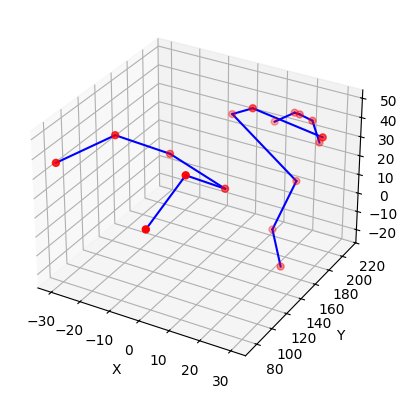

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# data["keypoints3d_optim"]의 형태: (frames, 17, 3)
kpts_3d = data["keypoints3d_optim"]

# 특정 프레임 선택 (예: 첫 번째 프레임)
frame_idx = 100
frame_kpts = kpts_3d[frame_idx]  # shape: (17, 3)

# x, y, z 좌표 분리
x = frame_kpts[:,0]
y = frame_kpts[:,1]
z = frame_kpts[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 플롯
ax.scatter(x, y, z, c='r', s=25)

# 연결선(스켈레톤) 정의 (COCO 포맷 예시)
# 필요하다면 COCO keypoints 스켈레톤 구조를 정의한 뒤 선을 그을 수 있음
# skeleton = [
    # (5, 6), (5,7), (7,9), (6,8), (8,10), 
    # (5,11), (6,12), (11,13), (13,15), (12,14), (14,16), 
    # (0,1), (0,2), (1,3), (2,4), (0,5), (0,6), (11,12)
# ]

skeleton = [
    (Joint.NOSE, Joint.L_EYE),
    (Joint.NOSE, Joint.R_EYE),
    (Joint.L_EYE, Joint.L_EAR),
    (Joint.R_EYE, Joint.R_EAR),
    (Joint.L_SHOLDER, Joint.R_SHOLDER),
    (Joint.L_SHOLDER, Joint.L_ELBOW),
    (Joint.R_SHOLDER, Joint.R_ELBOW),
    (Joint.L_ELBOW, Joint.L_WRIST),
    (Joint.R_ELBOW, Joint.R_WRIST),
    (Joint.L_HIP, Joint.R_HIP),
    (Joint.L_HIP, Joint.L_KNEE),
    (Joint.R_HIP, Joint.R_KNEE),
    (Joint.L_KNEE, Joint.L_ANKLE),
    (Joint.R_KNEE, Joint.R_ANKLE)
]

for (start, end) in skeleton:
    start, end = start.value, end.value
    xs = [x[start], x[end]]
    ys = [y[start], y[end]]
    zs = [z[start], z[end]]
    ax.plot(xs, ys, zs, c='b')

# 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# keypoints_list: [frame_index][person][2D keypoints array]
# 예: keypoints_list[frame] = [x1, y1, x2, y2, ..., x17, y17]

fig, ax = plt.subplots()

# 초기화 함수
def init():
    ax.set_xlim(0, 1920) # 이미지 혹은 좌표 범위에 맞추어 설정
    ax.set_ylim(1080, 0) # y축 방향 반전 필요 시
    return []

# 각 프레임 업데이트하는 함수
def update(frame):
    ax.clear()
    keypoints = keypoints_list[frame]
    # keypoints를 (x,y) 형태로 파싱
    xs = keypoints[0::2]
    ys = keypoints[1::2]

    # 점 찍기
    ax.scatter(xs, ys, c='r')

    # 뼈대 연결
    for (start, end) in skeleton:
        x1, y1 = xs[start], ys[start]
        x2, y2 = xs[end], ys[end]
        ax.plot([x1, x2], [y1, y2], c='b')

    ax.set_xlim(0, 1920)
    ax.set_ylim(1080, 0)
    return []

ani = animation.FuncAnimation(fig, update, frames=len(keypoints_list), init_func=init, blit=False, interval=50)
plt.show()